#  Completeness and Purity - DC2 with RedMaPPer - NumCosmo

---
**License**

 Completeness and Purity - DC2 with RedMaPPer - NumCosmo

 Mon Jan 13 14:30:00 2025\
 Copyright  2025\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---
 completeness_purity\
 Copyright (C) 2025 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Libraries & Configs

In [1]:
import sys

import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table
import pandas as pd

sys.path.insert(0, "/global/homes/c/cinlima/gcrcatalogs-new/gcr-catalogs")
sys.path.insert(0, "/global/homes/c/cinlima/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/MachingCatalogs")

import GCRCatalogs
#Put nersc if using nersc
GCRCatalogs.set_root_dir_by_site("nersc")

print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

# GCRCatalogs.get_available_catalog_names()

GCRCatalogs = 1.9.0 | GCR = 0.9.2


## Catalogs

In [2]:
#Cosmo DC2
cosmodc2= GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

#Cosmo DC2 + RedMaPPer
catalog_dc2_redmapper = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.8.1')

In [3]:
# Restrictions on richness, mass and redshift
min_richness = 5
min_halo_mass = 1e13 #Msun
redshift_max = 1.2

#cDC2 + RM data
quantities = catalog_dc2_redmapper.list_all_quantities()
cluster_quantities = [q for q in quantities if 'member' not in q]
member_quantities = [q for q in quantities if 'member' in q]
    
query = GCRCatalogs.GCRQuery('(richness > ' + str(min_richness) +')')
cluster_data = Table(catalog_dc2_redmapper.get_quantities(cluster_quantities, [query])) # cDC2 + RM cluster data
member_data = Table(catalog_dc2_redmapper.get_quantities(member_quantities)) # cDC2 + RM member data

#cDC2 data
quantities_wanted = ['redshift','halo_mass','halo_id','galaxy_id','ra','dec', 'is_central']
query = GCRCatalogs.GCRQuery('(halo_mass > ' + str(min_halo_mass) +') & (redshift < ' + str(redshift_max) +') & (is_central < ' + str(redshift_max) +') ')
truth_data = Table(cosmodc2.get_quantities(quantities_wanted, [query]))

AttributeError: `newbyteorder` was removed from the ndarray class in NumPy 2.0. Use `arr.view(arr.dtype.newbyteorder(order))` instead.

In [ ]:
# cluster_data

In [ ]:
halo_data = truth_data[truth_data['is_central'] == True]

In [ ]:
mdata = Table.read('CatalogsMatching/test.fits')
data = mdata[mdata['mass'] > 0]

mt_data = Table([[m[0] for m in data['mass']], [l for l in data['richness']], [r for r in data['z']]], names=('mass', 'richness', 'z'))


In [65]:
test_matchdata = pd.read_csv('/global/homes/c/cinlima/MatchingCatalogs/match_catalog.csv',  sep = ';')

rich_data = test_matchdata["richness"]
z_data = test_matchdata["redshift_y"]
mass_data = test_matchdata["halo_mass"]

mt_data2 = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'z'))


## Completeness

The **completeness** ($c(M, z)$) of a cluster catalog is defined as the fraction of true galaxy clusters correctly identified by the algorithm within a specific mass range ($M$)  and redshift ($z$). It is calculated as follows ([Aguena, Lima 2016](
https://doi.org/10.48550/arXiv.1611.05468
)):

$$
c(M, z) = \frac{N_{\text{mat}}(M, z)}{N_h(M, z)}
$$

Where:  
$N_{\text{mat}}(M, z)$ : Number of halos with mass ($M$) and redshift ($z$) that were correctly matched to clusters detected in the catalog.  
$N_h(M, z)$: Total number of halos with mass ($M$) and redshift ($z$) present in the dataset.

In [46]:
def completeness(halos, clusters, bin_range = None, bins = None) :

    hist_matches = np.histogram2d(clusters['z'], np.log10(clusters['mass']),range=bin_range, bins= bins)
    N_matches = hist_matches[0]
    # print(N_matches)
    
    hist_halos = np.histogram2d(halos["redshift"],np.log10(halos['halo_mass']),range=bin_range, bins= bins)
    N_halos = hist_halos[0]
    # print(N_halos)
    
    complet =  N_matches / N_halos 
           
    return complet


/tmp/ipykernel_820622/2017979192.py:11: RuntimeWarning: invalid value encountered in divide
  complet =  N_matches / N_halos


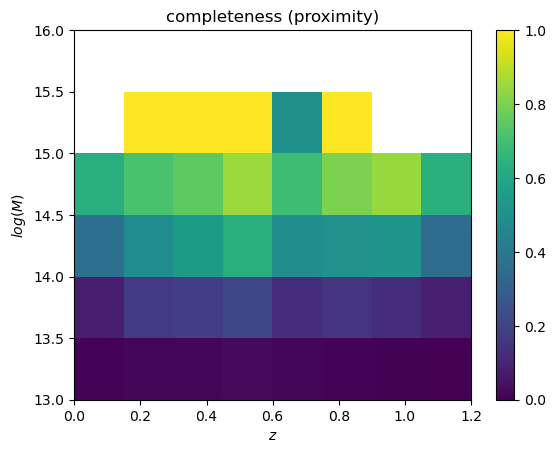

In [68]:
bin_range = [[0.0,1.2],[13.,16]]
bins = [8,6]

complet = completeness(halo_data, mt_data, bin_range = bin_range, bins = bins) 

fig, ax = plt.subplots(1,1)

hist2d = ax.imshow(complet.T,origin = 'lower',aspect='auto',extent = [bin_range[0][0],bin_range[0][1], 
                                                                  bin_range[1][0], bin_range[1][1]], vmin=0, vmax=1, cmap='viridis')
fig.colorbar(hist2d , ax=ax)

ax.set_xlabel('$z$')
ax.set_ylabel('$log(M)$')

ax.set_title('completeness (proximity)')

plt.show()

/tmp/ipykernel_820622/2017979192.py:11: RuntimeWarning: invalid value encountered in divide
  complet =  N_matches / N_halos


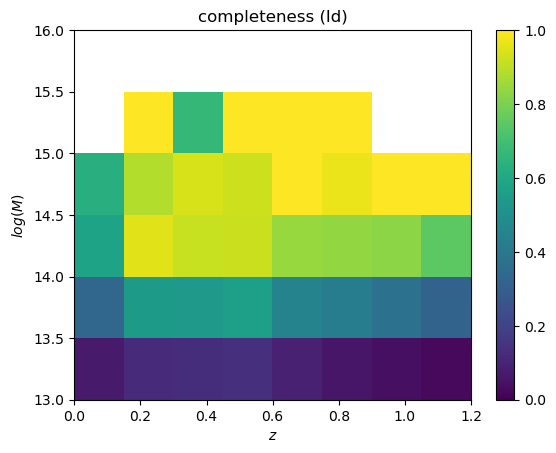

In [67]:
bin_range = [[0.0,1.2],[13.,16]]
bins = [8,6]

complet = completeness(halo_data, mt_data2, bin_range = bin_range, bins = bins) 

fig, ax = plt.subplots(1,1)

hist2d = ax.imshow(complet.T,origin = 'lower',aspect='auto',extent = [bin_range[0][0],bin_range[0][1], 
                                                                  bin_range[1][0], bin_range[1][1]], vmin=0, vmax=1, cmap='viridis')
fig.colorbar(hist2d , ax=ax)

ax.set_xlabel('$z$')
ax.set_ylabel('$log(M)$')

ax.set_title('completeness (Id)')

plt.show()

## Purity

**Purity** ( $ p(\lambda, z)$ ) measures the fraction of detected clusters that correspond to true halos, serving as a metric to avoid false positives in the catalog. It is calculated as ([Aguena, Lima 2016](
https://doi.org/10.48550/arXiv.1611.05468
)):

$$
p(M, z) = \frac{N_{\text{mat}}(\lambda, z)}{N_c(\lambda, z)}
$$

Where:  
$ N_{\text{mat}}(\lambda, z)$: Number of detected clusters that are correctly matched to true dark matter halos.  
$ N_c(\lambda, z) $: Total number of clusters detected by the algorithm within an observed richness range $\lambda$ and  redshift $z$.

In [62]:
def purity(catalog_clusters, clusters, bin_range = None, bins = None) :

    hist_matches = np.histogram2d(clusters['z'], np.log10(clusters['richness']),range=bin_range, bins= bins)
    N_matches = hist_matches[0]
    # print(N_matches)
    
    hist_c = np.histogram2d(catalog_clusters["redshift"],np.log10(catalog_clusters['richness']),range=bin_range, bins= bins)
    N_c = hist_c[0]
    # print(N_c)
    
    purit =  N_matches / N_c 
           
    return purit


/tmp/ipykernel_820622/2915413369.py:11: RuntimeWarning: invalid value encountered in divide
  purit =  N_matches / N_c


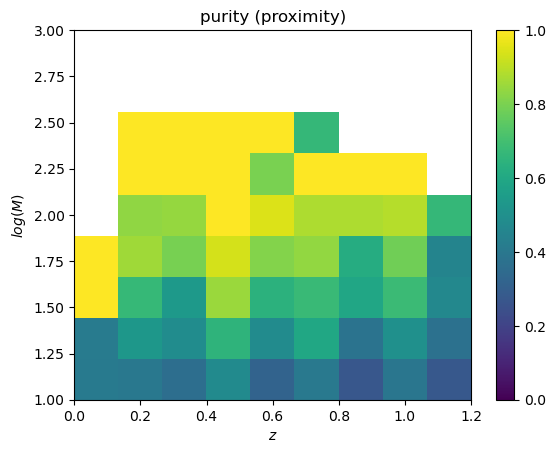

In [69]:
bin_range = [[0, 1.2],[1.0, 3.0]]
bins = [9,9]

complet = purity(cluster_data, mt_data, bin_range = bin_range, bins = bins) 

fig, ax = plt.subplots(1,1)

hist2d = ax.imshow(complet.T,origin = 'lower',aspect='auto',extent = [bin_range[0][0],bin_range[0][1], 
                                                                  bin_range[1][0], bin_range[1][1]], vmin=0, vmax=1, cmap='viridis')
fig.colorbar(hist2d , ax=ax)

ax.set_xlabel('$z$')
ax.set_ylabel('$log(M)$')

ax.set_title('purity (proximity)')

plt.show()

/tmp/ipykernel_820622/2915413369.py:11: RuntimeWarning: invalid value encountered in divide
  purit =  N_matches / N_c


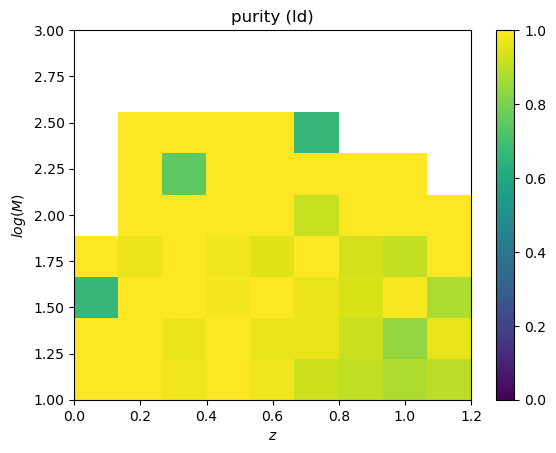

In [71]:
bin_range = [[0, 1.2],[1.0, 3.0]]
bins = [9,9]

complet = purity(cluster_data, mt_data2, bin_range = bin_range, bins = bins) 

fig, ax = plt.subplots(1,1)

hist2d = ax.imshow(complet.T,origin = 'lower',aspect='auto',extent = [bin_range[0][0],bin_range[0][1], 
                                                                  bin_range[1][0], bin_range[1][1]], vmin=0, vmax=1, cmap='viridis')
fig.colorbar(hist2d , ax=ax)

ax.set_xlabel('$z$')
ax.set_ylabel('$log(M)$')

ax.set_title('purity (Id)')

plt.show()